<center> Python implementation of Kernel Current Source Density (kCSD) method - TUTORIAL </center>
======

In [1]:
%load_ext autoreload
%autoreload 2

from ipywidgets import interact
import numpy as np
import config

import plotting_helpers as plots
from widget_helpers import dim_select, csd_select, kcsd_select, accordion, nr_ele_select, nr_broken_ele, noise_select, regularization_select

In [2]:
# Select dimensions of your setup

dim_select

ToggleButtons(description='Dimensions of the setup:', options=('1D', '2D', '3D'), tooltips=['Laminar probes', 'MEA like flat electrodes', 'Utah array or SEEG'], value='1D')

In [3]:
# Select a type of CSD source

csd_select


ToggleButtons(description='True source type', options=('monopole gauss', 'dipole gauss'), value='monopole gauss')

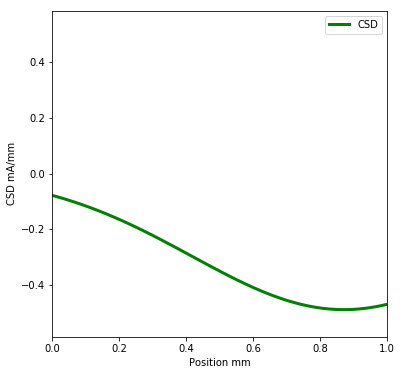

In [4]:
val = config.ValidateKCSD(dim=int(dim_select.value[0]))
csd_seed = 5
csd_at, true_csd = val.generate_csd(config.csd_profile, csd_seed=csd_seed)
plots.show_csd(csd_at, true_csd)

In [5]:
# Select number of electrodes

nr_ele_select

BoundedIntText(value=10, description='Select nr of electrodes:', max=200, min=1)

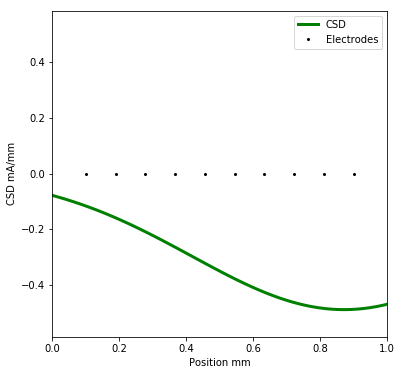

In [6]:
ele_pos = val.generate_electrodes(total_ele=nr_ele_select.value, ele_lims=[0.1, 0.9])
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)

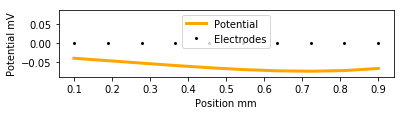

In [7]:
h = 0.25
sigma = 0.3
pots = val.calculate_potential(true_csd, csd_at, ele_pos, h, sigma)
plots.show_pot(ele_pos, pots)

In [8]:
# Do you want to investigate data with noise or without?

noise_select

FloatSlider(value=0.0, continuous_update=False, description='Noise level [%]:', readout_format='.1f')

In [9]:
if noise_select.value > 0:
    pots = val.add_noise(pots, level=noise_select.value)

In [10]:
kcsd_select

ToggleButtons(description='KCSD method', options=('ValidateKCSD1D',), value='ValidateKCSD1D')

In [11]:
# Call the main class with parameters of ground truth data and measurement setup

k = config.kCSD(csd_seed, **config.defaults[config.kCSD.__name__])

In [12]:
# Choose regularization method: cross-validation or L-curve

regularization_select

Select(description='Regularization method:', options=('cross-validation', 'L-curve'), value='cross-validation')

In [ ]:
# Estimate current source density, change value of Rs to fit the best solution using crossvalidation

obj, est_csd = k.do_kcsd(pots, ele_pos, method=regularization_select.value, Rs=np.arange(0.2, 0.5, 0.1))
plots.show_csd(obj.estm_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

In [ ]:
# Investigate spectral structure of kCSD reconstruction

structure = config.SpectralStructure(obj)

In [ ]:
u_svd, sigma, v_svd = structure.svd()

Visibility maps
------

In [14]:
vmap = config.visibility_map(total_ele=nr_ele_select.value, **config.defaults[config.kCSD.__name__])

#### Calculate errors for Visibility Map

It may take a few minutes.

In [15]:
# n - number of (pseudo) random sources included in calculation of error map 

rms, point_error = vmap.calculate_error_map(config.csd_profile,
                                            n=100, Rs=np.arange(0.2, 0.5, 0.1), method=regularization_select.value)

Number of electrodes: 25
Number of electrodes: 25
Number of electrodes: 25
Number of electrodes: 25
Number of electrodes: 25
Number of electrodes: 25
Number of electrodes: 25
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
No lambda given, using defaults
min lambda 0.0001
No lambda given, using defaults
max lambda 0.0079
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
min lambda 0.0001
max lambda 0.0079
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
min lambda 0.0001
max lambda 0.0079
max lambda 0.0079
l-curve (all lambda):  0.2
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.007

max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-05
max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-05
max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
Best lambda and R =  3.67260634596e-05 ,  0.2
Number of electrodes: 25
Best lambda and R =  0.00467213817371 ,  0.4
Best lambda and R =  0.118179788926 ,  0.4
Best lambda and R =  3.67260634596e-05 ,  0.2
Number of electrodes: 25
Best lambda and R =  3.67260634596e-05 ,  0.2
Number of electrodes: 25
Number of electrodes: 25
Best lambda and R =  3.67260634596e-05 ,  0.2
Number of electrodes: 25


No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 0.0001
max lambda 0.0079
l-curve (all lambda):  0.2
min lambda 1e-05
max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-05
max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-05
max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-05
max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-05
max lambda 0.0078
l-curve (all lambda):  0.3
min lambda 1e-05
max lambda 0.0078
l-curve (a

l-curve (all lambda):  0.4
Best lambda and R =  3.67260634596e-05 ,  0.2
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
Number of electrodes: 25
min lambda 1e-06
max lambda 0.0076
l-curve (all lambda):  0.4
Best lambda and R =  3.67260634596e-05 ,  0.2
Number of electrodes: 25
Best lambda and R =  3.67260634596e-05 ,  0.2
Best lambda and R =  0.0689771566372 ,  0.4
Best lambda and R =  3.67260634596e-05 ,  0.2
Number of electrodes: 25
Number of electrodes: 25
Number of electrodes: 25
Best lambda and R =  3.67260634596e-05 ,  0.2
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
Number of electrodes: 25
Best lambda and R =  3.67260634596e-05 ,  0.2
Number of electrodes: 25
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda given, using defaults
min lambda 0.0001
max lambda 0.0079
No lambda give

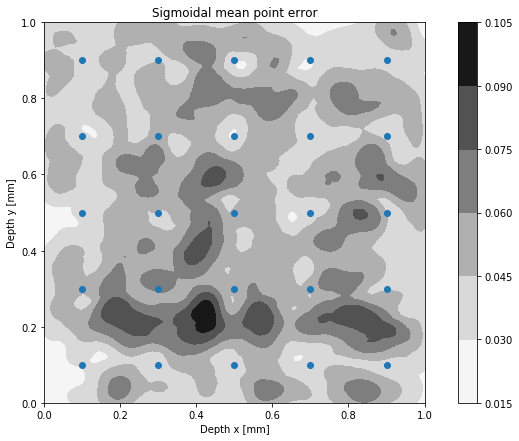

In [16]:
mask = vmap.plot_error_map(point_error, ele_pos)

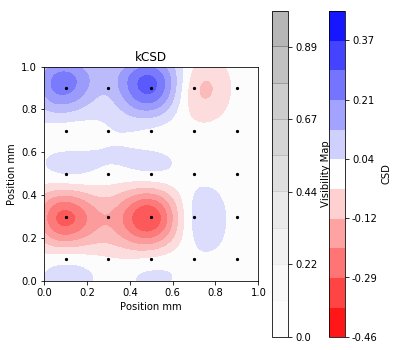

In [17]:
plots.show_csd(obj.estm_pos, est_csd, show_ele=ele_pos, show_kcsd=True, show_mask=mask)

In [ ]:
# Choose how many electrodes are broken

nr_broken_ele

In [ ]:
ele_pos_br = vmap.generate_electrodes(total_ele=nr_ele_select.value, ele_lims=[0.1, 0.9],
                                      nr_broken_ele=nr_broken_ele.value)

In [ ]:
rms_br, point_error_br = vmap.calculate_error_map(config.csd_profile,
                                                  n=100, Rs=np.arange(0.2, 0.5, 0.1),
                                                  nr_broken_ele=nr_broken_ele.value, method=regularization_select.value)

In [ ]:
mask_br = vmap.plot_error_map(point_error_br, ele_pos_br)